In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

## Data importing & inspecting Data

In [2]:
startups = pd.read_excel('startup-expansion.xlsx')

In [5]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [11]:
startups[['Marketing Spend','Revenue']].describe().round(2)

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


## Preprocessing Data

In [13]:
startups['City'].unique()

array(['Peoria', 'Midland', 'Spokane', 'Denton', 'Overland Park',
       'Yonkers', 'Birmingham', 'Antioch', 'Worcester', 'Rochester',
       'Rialto', 'Santa Maria', 'Las Cruces', 'Jackson', 'Hillsboro',
       'Temecula', 'Tallahassee', 'Fontana', 'Kent', 'Broken Arrow',
       'Concord', 'Modesto', 'Montgomery', 'Burbank', 'Elk Grove',
       'Port St. Lucie', 'Elizabeth', 'Salt Lake City', 'Waco', 'Edison',
       'Boulder', 'Grand Rapids', 'Tyler', 'Charleston', 'Huntsville',
       'Pearland', 'Inglewood', 'Oxnard', 'Miramar', 'Cape Coral',
       'Syracuse', 'Newport News', 'Lewisville', 'Carrollton',
       'San Bernardino', 'Pasadena', 'Roseville', 'Murrieta',
       'San Angelo', 'Olathe', 'Akron', 'Fullerton', 'Manchester',
       'Everett', 'West Covina', 'Thornton', 'Hampton', 'Waterbury',
       'Ventura', 'Davenport', 'Columbia', 'Simi Valley', 'Richmond',
       'Little Rock', 'El Cajon', 'Santa Clara', 'Oceanside', 'Davie',
       'Lakeland', 'Centennial', 'Lowell', 'O

In [17]:
startups['City'].nunique()

149

In [18]:
startups['State'].unique()

array(['Arizona', 'Texas', 'Washington', 'Kansas', 'New York', 'Alabama',
       'California', 'Massachusetts', 'New Mexico', 'Mississippi',
       'Oregon', 'Florida', 'Oklahoma', 'New Jersey', 'Utah', 'Colorado',
       'Michigan', 'South Carolina', 'Virginia', 'Ohio', 'New Hampshire',
       'Connecticut', 'Iowa', 'Arkansas', 'Tennessee', 'North Carolina',
       'Georgia', 'Illinois', 'Montana', 'Indiana', 'South Dakota',
       'Louisiana', 'Minnesota', 'Wisconsin', 'Rhode Island'],
      dtype=object)

In [19]:
startups['State'].nunique()

35

In [14]:
startups['City'].value_counts()

City
Rochester        2
Killeen          1
Wichita Falls    1
Naperville       1
Clovis           1
                ..
Akron            1
Fullerton        1
Manchester       1
Everett          1
Thousand Oaks    1
Name: count, Length: 149, dtype: int64

In [16]:
startups['State'].value_counts()

State
California        40
Texas             17
Florida           12
Washington         7
Colorado           5
Illinois           5
Georgia            4
Alabama            4
Connecticut        4
New Jersey         4
Arizona            3
Tennessee          3
Iowa               3
Michigan           3
South Carolina     3
Utah               3
Massachusetts      3
Kansas             3
New York           3
Louisiana          2
North Carolina     2
Ohio               2
Virginia           2
Oregon             2
Mississippi        1
New Mexico         1
Arkansas           1
New Hampshire      1
Oklahoma           1
Montana            1
Indiana            1
South Dakota       1
Minnesota          1
Wisconsin          1
Rhode Island       1
Name: count, dtype: int64

In [20]:
startups['Sales Region'].unique()

array(['Region 2', 'Region 1'], dtype=object)

In [21]:
startups['Sales Region'].value_counts()

Sales Region
Region 2    86
Region 1    64
Name: count, dtype: int64

In [22]:
startups['New Expansion'].unique()

array(['Old', 'New'], dtype=object)

In [23]:
startups['New Expansion'].value_counts()

New Expansion
Old    140
New     10
Name: count, dtype: int64

In [24]:
startups.isna().sum()

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
dtype: int64

In [25]:
startups.duplicated().sum()

np.int64(0)

## Exploring & Analysing Data 

In [26]:
startups.sample(10)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
39,40,Cape Coral,Florida,Region 1,Old,2886,52250
81,82,Fort Lauderdale,Florida,Region 1,Old,3217,54768
20,21,Concord,California,Region 2,Old,2521,38178
33,34,Charleston,South Carolina,Region 1,Old,2484,34829
51,52,Fullerton,California,Region 2,Old,3246,44223
19,20,Broken Arrow,Oklahoma,Region 2,Old,2765,19120
145,146,Paterson,New Jersey,Region 1,New,2251,34603
86,87,Amarillo,Texas,Region 2,Old,3984,56089
79,80,Costa Mesa,California,Region 2,Old,2275,41361
35,36,Pearland,Texas,Region 2,Old,3127,20057


<Axes: xlabel='Sales Region'>

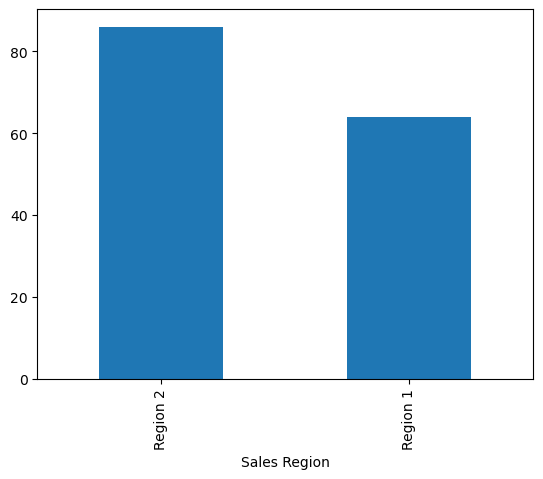

In [27]:
startups['Sales Region'].value_counts().plot.bar()

In [28]:
startups.groupby('New Expansion').groups

{'New': [140, 141, 142, 143, 144, 145, 146, 147, 148, 149], 'Old': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]}

In [29]:
startups[startups['New Expansion'] == 'Old']

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
135,136,San Mateo,California,Region 2,Old,1811,19426
136,137,Warren,Michigan,Region 1,Old,2736,47262
137,138,Norwalk,California,Region 2,Old,3112,19703
138,139,Lafayette,Louisiana,Region 1,Old,2603,40255


In [33]:
startups[startups['New Expansion'] == 'New'].groupby('City').sum()['Revenue'].nlargest(10)

City
Brownsville         63148
Chattanooga         55357
Rancho Cucamonga    52366
Glendale            49376
Tempe               48954
Joliet              48315
Rockford            43377
Thousand Oaks       40141
Paterson            34603
College Station     22457
Name: Revenue, dtype: int64

In [44]:
startups[startups['New Expansion'] == 'Old'].groupby(['State']).sum()['Revenue'].nlargest(10)

State
California     1362468
Texas           554964
Florida         479023
Washington      298013
Alabama         221025
New York        160046
Connecticut     158511
Georgia         157656
Colorado        156495
Michigan        147759
Name: Revenue, dtype: int64

In [45]:
# startups['ROI'] = round((startups['Revenue'] / startups['Marketing Spend']) * 100,2)

In [46]:
startups['Profit'] = startups['Revenue'] - startups['Marketing Spend']

In [47]:
startups['ROMS'] = round((startups['Profit'] / startups['Marketing Spend'])*100,2)

In [49]:
startups['ROMS%'] = startups['ROMS'] / 100

In [50]:
startups


,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,ROI,Profit,ROMS,ROMS%
0,1,Peoria,Arizona,Region 2,Old,2601,48610,1868.90,46009,1768.90,17.6890
1,2,Midland,Texas,Region 2,Old,2727,45689,1675.43,42962,1575.43,15.7543
2,3,Spokane,Washington,Region 2,Old,2768,49554,1790.25,46786,1690.25,16.9025
3,4,Denton,Texas,Region 2,Old,2759,38284,1387.60,35525,1287.60,12.8760
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,2087.38,57018,1987.38,19.8738
...,...,...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,1537.23,32352,1437.23,14.3723
146,147,Brownsville,Texas,Region 2,New,3675,63148,1718.31,59473,1618.31,16.1831
147,148,Rockford,Illinois,Region 1,New,2648,43377,1638.10,40729,1538.10,15.3810
148,149,College Station,Texas,Region 2,New,2994,22457,750.07,19463,650.07,6.5007


In [51]:
startups.to_csv('startups-expansion-modified.csv')